In [2]:
# Part 2
## Problem 1
# Training data (X, y), T time steps, alpha step
def grad_descent(X, y, T, alpha):
    m, n = X.shape # m = #examples, n = #features
    theta = np.zeros(n) # initialize parameters
    f = np.zeros(T) # track loss over time
    for i in range(T):
        # loss for current parameter vector theta
        f[i] = 0.5*np.linalg.norm(X.dot(theta)-y)**2
        # compute steepest ascent at f(theta)
        g = X.T.dot(X.dot(theta) - y)
        # step down the gradient
        theta = theta - alpha*g
    return theta, f

## Problem 2
  gradient descent update equation for logistic regression:
  $  \beta^{k+1} = \beta^k + \alpha \sum_{i=1}^{n} (y_i - p_i(\beta^k))\mathbf{x_i} $
  
  Perform the logit transform on odds ad form a linear model:
  $ \log{\frac{p(x)} {1 - p(x)}} = \beta_0 + \beta_{1^x} $
  
  Translate back into probability 
  
  $  p_i(\beta^k) =\frac{e^{f_i(\beta^k)}} {1+e^{f_i(\beta^k)}} $
  
  The tell us given a learned linear model, what the probability $\beta^k$ of an event pccurring is given input value x


In [38]:
## Problem 3
import math
def logistic_func(theta, x):
    return math.e**(-x.dot(theta)) / (1 + math.e**(-x.dot(theta)))
def log_gradient(theta, x, y):
    first_calc = logistic_func(theta, x) - np.squeeze(y)
    final_calc = first_calc.T.dot(x)
    return final_calc
def update_grad_descent(X, y, T, alpha):
    m, n = X.shape # m = #examples, n = #features
    theta = np.zeros(n) # initialize parameters
    f = np.zeros(T) # track loss over time
    for i in range(T):
        # loss for current parameter vector theta
        f[i] = 0.5*np.linalg.norm(X.dot(theta)-y)**2
        # compute steepest ascent at f(theta)
        g = X.T.dot(X.dot(theta) - y)
        # step down the gradient
        theta = theta - alpha*log_gradient(theta, X, y)
    return theta, f
#“batch” gradient descent because we use the entire batch of points X to calculate each gradient, 
#as opposed to stochastic gradient descent. which uses one point at a time

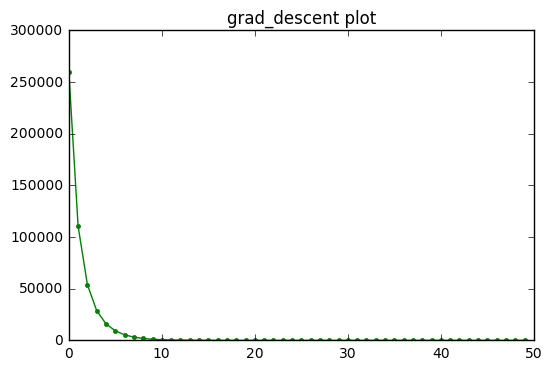

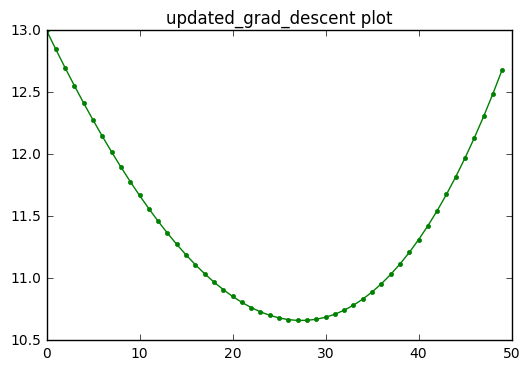

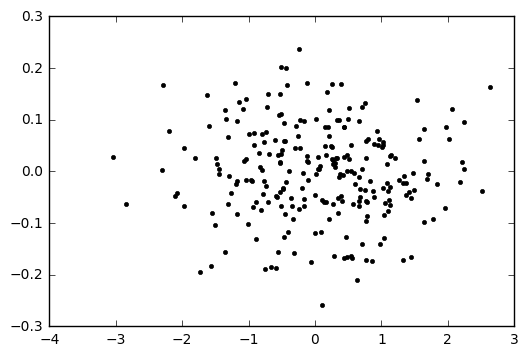

In [40]:
#Problem 4
# simulate data for linear regression

import sklearn.datasets
import numpy as np
import matplotlib.pylab as plt
from sklearn import linear_model

gen_data_x, gen_data_y = sklearn.datasets.make_regression(n_samples=50, n_features=5, noise = 1.5)

#simulate data for logistic regression.  This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = sklearn.datasets.make_regression(n_samples=50, n_features=5, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]

g = (grad_descent(gen_data_x, gen_data_y, 50, 0.01))

plt.plot(g[1],linestyle='-', marker='.', color='green')
plt.title("grad_descent plot")
plt.show()


l = update_grad_descent(log_gen_data_x, log_gen_data_y, 50, 0.0005)

plt.plot(l[1],linestyle='-', marker='.', color='green')
plt.title("updated_grad_descent plot")
plt.show()
# a really bad estimator
# returns random vector as estimated parameters
dummy = np.ndarray([50, 5])
for index, row in enumerate(dummy):
    dummy[index] = np.random.normal(0, .1, 5)
plt.plot(gen_data_x, dummy, linestyle='None', marker='.', color='black')

plt.show()

     IDNO  BODYFAT  DENSITY  AGE  WEIGHT  HEIGHT  ADIPOSITY  NECK  CHEST  \
0       1     12.6   1.0708   23  154.25   67.75       23.7  36.2   93.1   
1       2      6.9   1.0853   22  173.25   72.25       23.4  38.5   93.6   
2       3     24.6   1.0414   22  154.00   66.25       24.7  34.0   95.8   
3       4     10.9   1.0751   26  184.75   72.25       24.9  37.4  101.8   
4       5     27.8   1.0340   24  184.25   71.25       25.6  34.4   97.3   
5       6     20.6   1.0502   24  210.25   74.75       26.5  39.0  104.5   
6       7     19.0   1.0549   26  181.00   69.75       26.2  36.4  105.1   
7       8     12.8   1.0704   25  176.00   72.50       23.6  37.8   99.6   
8       9      5.1   1.0900   25  191.00   74.00       24.6  38.1  100.9   
9      10     12.0   1.0722   23  198.25   73.50       25.8  42.1   99.6   
10     11      7.5   1.0830   26  186.25   74.50       23.6  38.5  101.5   
11     12      8.5   1.0812   27  216.00   76.00       26.3  39.4  103.6   
12     13   

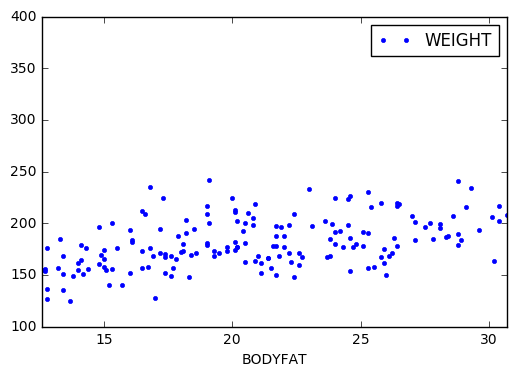

ValueError: total size of new array must be unchanged

In [78]:
# Try it out
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import column_or_1d
from sklearn import svm
data = pd.read_excel("BodyFat.xls")
df = pd.DataFrame(data, columns=data.columns)
print(df)
df.plot(x='BODYFAT', y="WEIGHT", linestyle="None", marker='.')
plt.show()

x = np.asarray(df['WEIGHT'], dtype="|S6")
y= np.asarray(df['BODYFAT'], dtype="|S6")
x = x.reshape(-1,1)
y = y.reshape(-1,1)
clf = svm.SVC(kernel='linear', C = 1.0)
cz
regr =clf.fit(x,y)
print(regr)
scores = cross_val_score(clf, x, y, cv=10)
print(scores)